# Прочерчивание максимумов Х-структуры -- построение коллажей


In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7f867c15b8c0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import os
import shutil
import pandas as pd
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.lines as mlines
import warnings
from astropy.visualization import astropy_mpl_style
import copy
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from libs.mathFunctions import explaw
from libs.mathFunctions import fit_by_explaw

In [28]:
n_galaxies = 18 # 18
names = [['h_1237','h_1237_0_4',0.4],['h_eon150','h_eon150_0_4',0.4],['ib_732','ib_732_0_4',0.4],
         ['ib_1720','ib_1720_0_4',0.4],['ib_2015','ib_2015_0_3',0.3],['mb_804','mb_804_0_4',0.4],
         ['mb_1354','mb_1354_0_3',0.3],['mb_1640','mb_1640_0_3',0.3],['mb_eon183','mb_eon183_0_4',0.4],
         ['h_1237','h_1237_0_7',0.7],['h_eon150','h_eon150_0_7',0.7],['ib_732','ib_732_0_7',0.7],
         ['ib_1720','ib_1720_0_7',0.7],['ib_2015','ib_2015_0_7',0.7],['mb_804','mb_804_0_7',0.7],
         ['mb_1354','mb_1354_0_7',0.7],['mb_1640','mb_1640_0_7',0.7],['mb_eon183','mb_eon183_0_7',0.7]]

#names = [['h_1237','h_1237_0_7',0.7],['h_eon150','h_eon150_0_7',0.7],['ib_732','ib_732_0_7',0.7],
#         ['ib_1720','ib_1720_0_7',0.7],['ib_2015','ib_2015_0_7',0.7],['mb_804','mb_804_0_7',0.7],
#         ['mb_1354','mb_1354_0_7',0.7],['mb_1640','mb_1640_0_7',0.7],['mb_eon183','mb_eon183_0_7',0.7]]

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.3-0.4


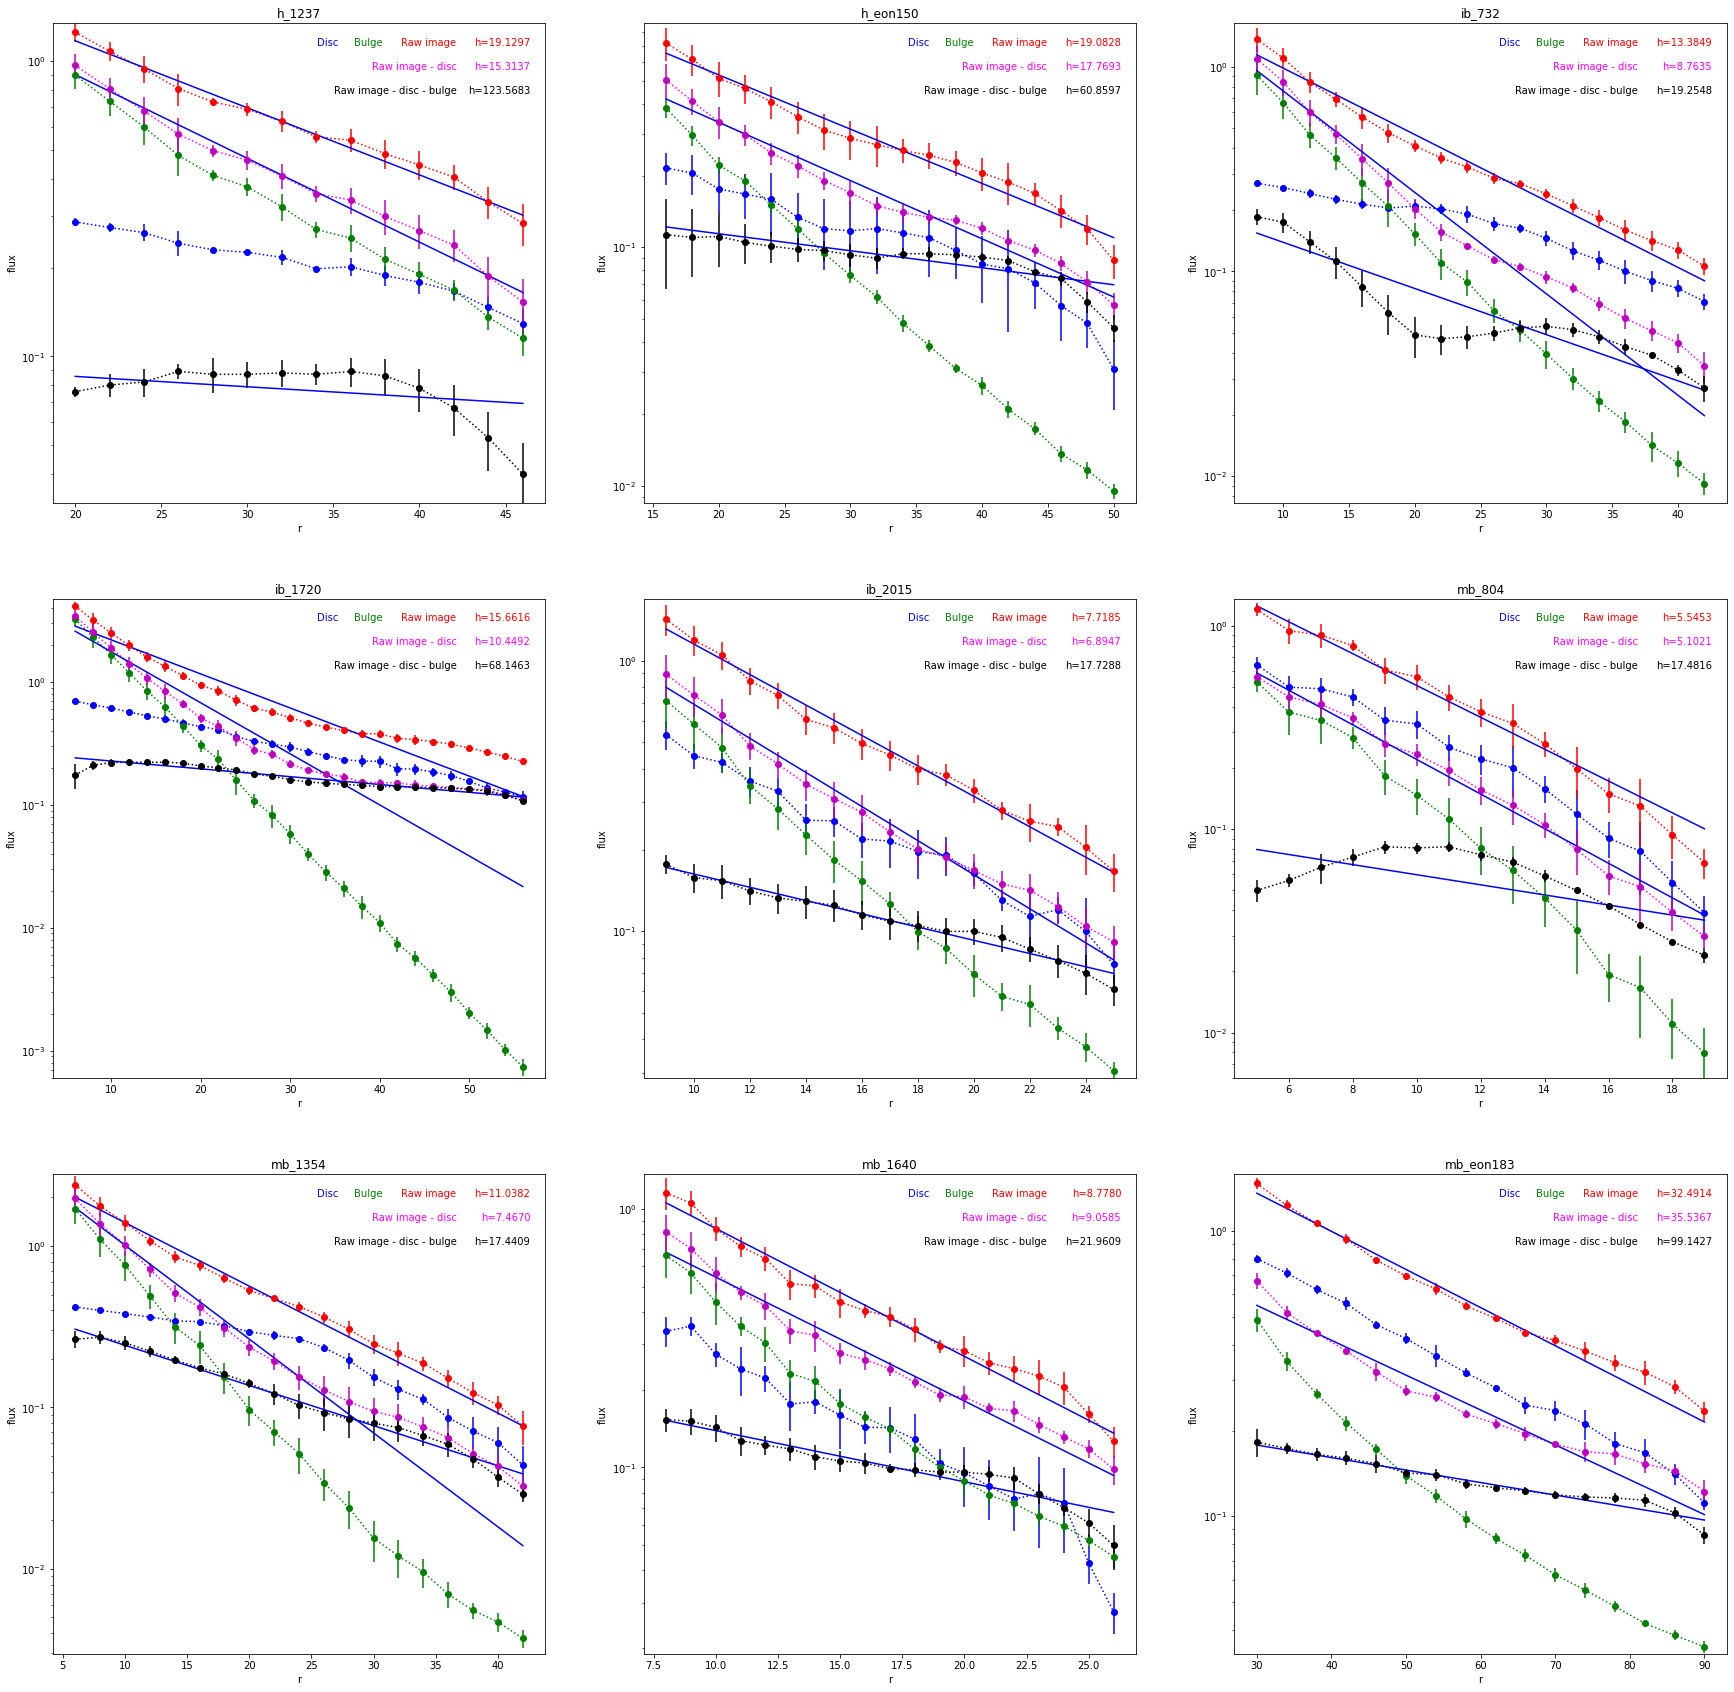

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.7


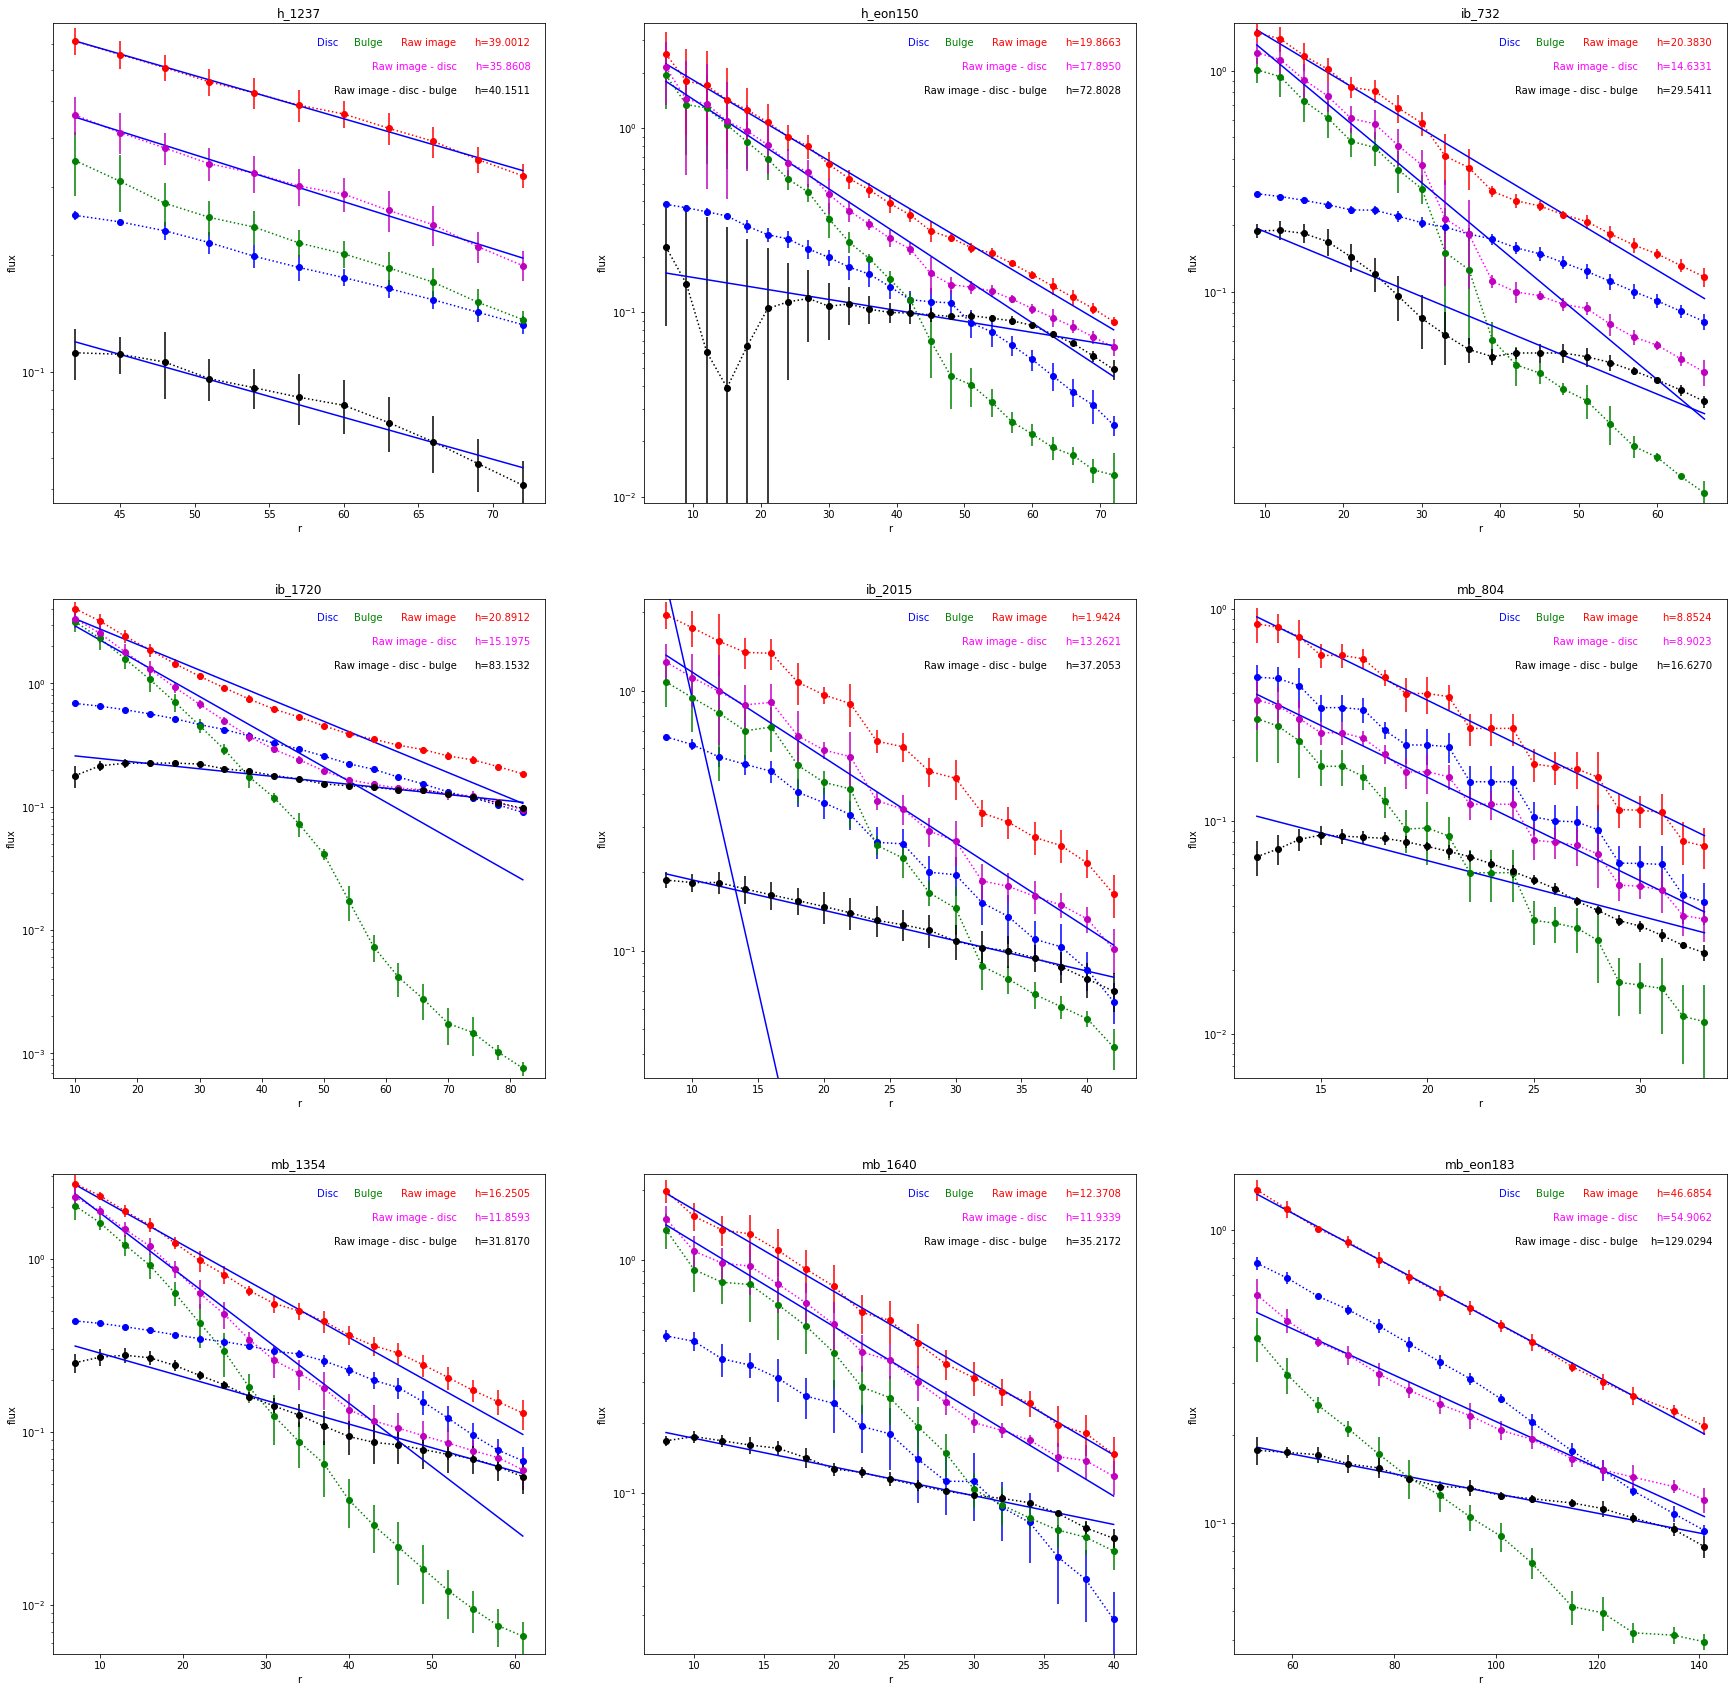

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.3-0.4 VS 0.7


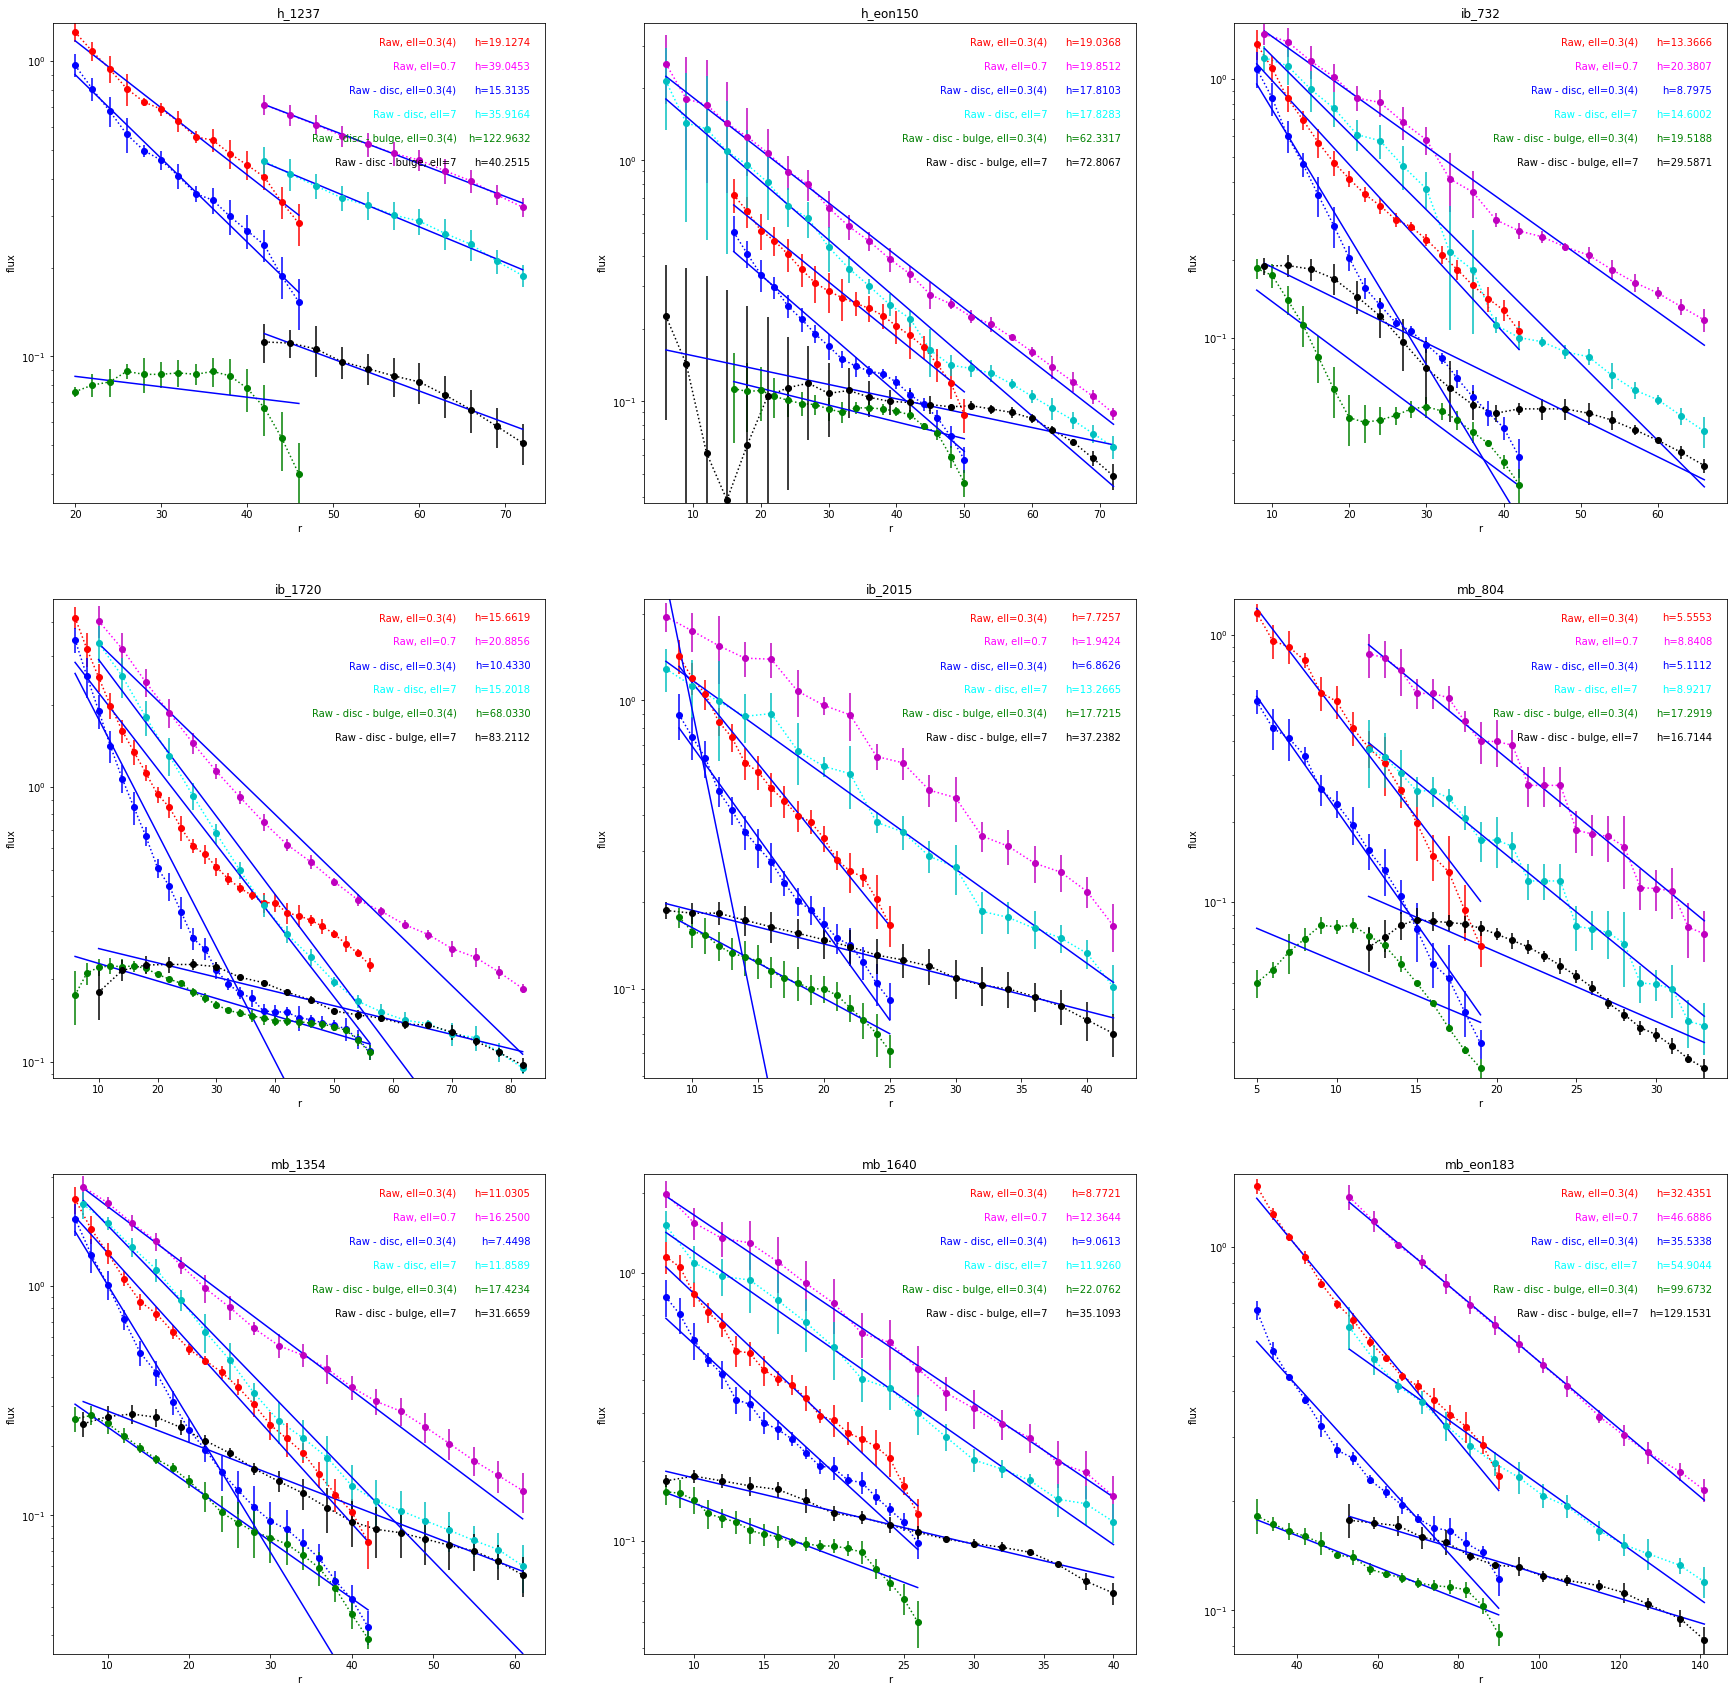

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ellipticity = 0.3-0.4 VS 0.7


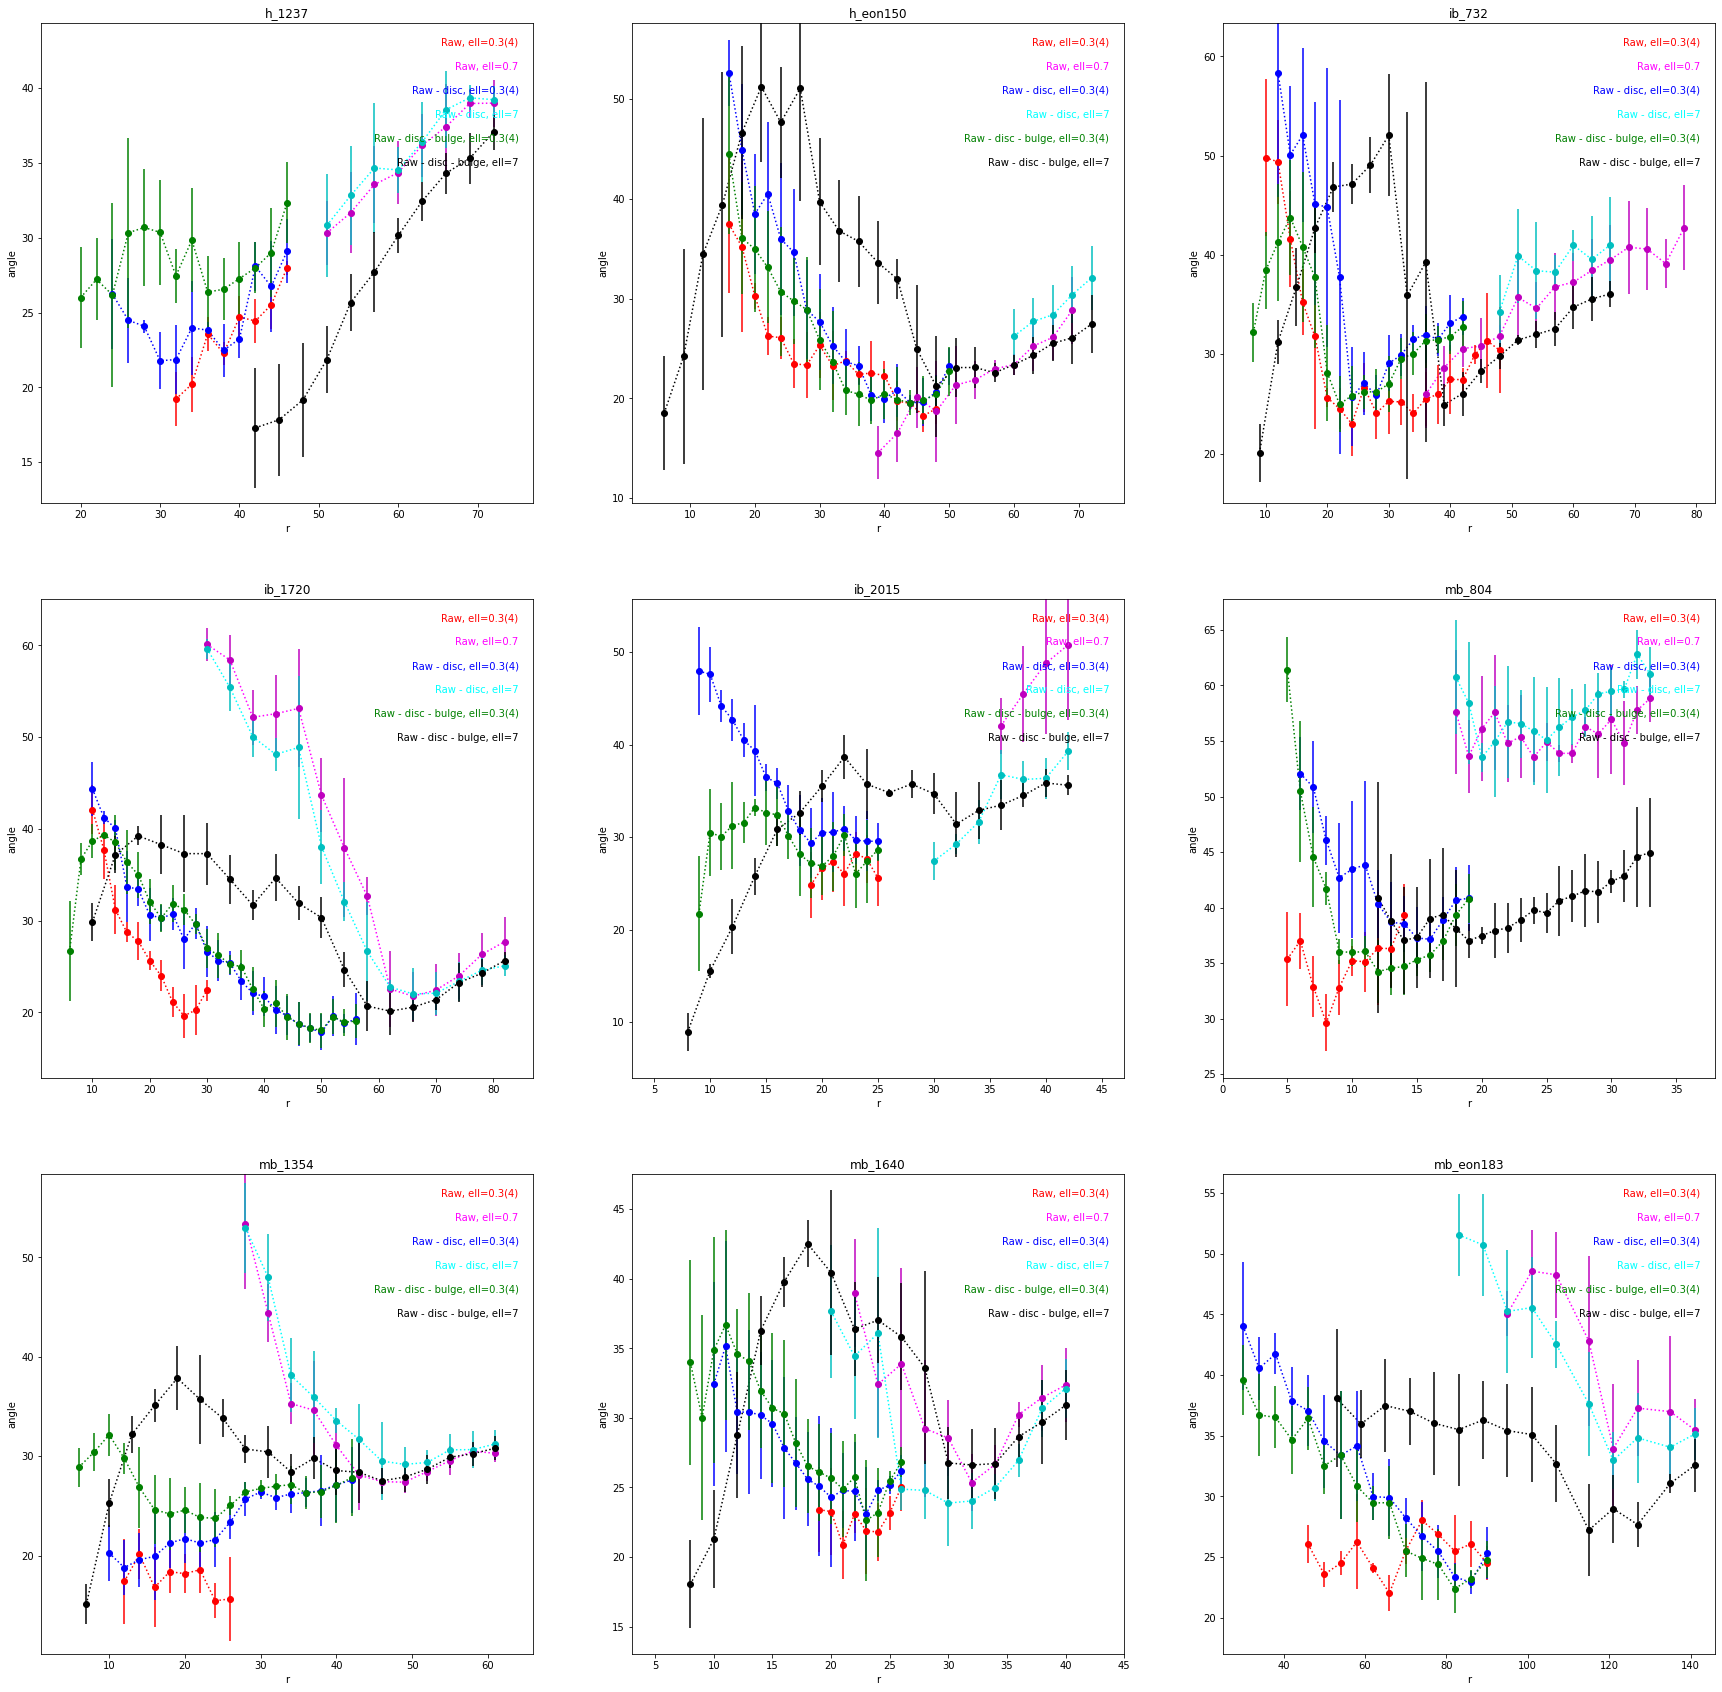

In [43]:
print('=*'*50)
print("ellipticity = 0.3-0.4")
fig = plt.figure(figsize=[30,30])
dop = 0
radii_a,radii_d,radii_m,angles_a,angles_d,angles_m = [],[],[],[],[],[]
intens_a,intens_d,intens_m = [],[],[]
for i in range(0,n_galaxies):
    
    name_gal = names[i][0]
    name_gal_ell = names[i][1]
    
    path_image = './images/image_{}.fits'.format(name_gal)
    path_image_disc = './images/image_{}_d.fits'.format(name_gal)
    #path_image_disc_bulge = './images/image_{}_m.fits'.format(name_gal)
    path_model_disc = './images/model_{}_d.fits'.format(name_gal) 
    path_model_bulge = './images/model_{}_b.fits'.format(name_gal)
    path_angles_hand_a = './result/{}_a/angles_hand.dat'.format(name_gal_ell)
    path_angles_hand_d = './result/{}_d/angles_hand.dat'.format(name_gal_ell)
    path_angles_hand_m = './result/{}_m/angles_hand.dat'.format(name_gal_ell)
    path_coords_hand_m = './result/{}_m/coord_xy_peaks_hand.dat'.format(name_gal_ell)
    path_intens_hand_m = './result/{}_m/intensities_hand.dat'.format(name_gal_ell)  
    path_bestfit = './bestfits_decomp/bestfit_{}.imfit'.format(name_gal)
    path_collage_int1 = './result/collage_int1.png'
    path_collage_int2 = './result/collage_int2.png'
    hdulist_image  = fits.open(path_image)
    data_image = hdulist_image[0].data
    hdulist_image_disc  = fits.open(path_image_disc)
    data_image_disc = hdulist_image_disc[0].data 
    #hdulist_image_disc_bulge  = fits.open(path_image_disc_bulge)
    #data_image_disc_bulge = hdulist_image_disc_bulge[0].data   
    hdulist_model_d  = fits.open(path_model_disc)
    data_model_d = hdulist_model_d[0].data 
    hdulist_model_b  = fits.open(path_model_bulge)
    data_model_b = hdulist_model_b[0].data    
    radii_hand_a = np.loadtxt(path_angles_hand_a, usecols=[0], comments='#') 
    radii_hand_d = np.loadtxt(path_angles_hand_d, usecols=[0], comments='#') 
    radii_hand_m = np.loadtxt(path_angles_hand_m, usecols=[0], comments='#') 
    angles_hand_a = np.loadtxt(path_angles_hand_a, usecols=[9,10], comments='#') 
    angles_hand_d = np.loadtxt(path_angles_hand_d, usecols=[9,10], comments='#') 
    angles_hand_m = np.loadtxt(path_angles_hand_m, usecols=[9,10], comments='#') 
    intens_hand_m = np.loadtxt(path_intens_hand_m, usecols=np.arange(1,11), comments='#') 
    coords_hand_m = np.loadtxt(path_coords_hand_m, usecols=np.arange(1,17), comments='#') 
    
    radii_a.append(radii_hand_a)
    radii_d.append(radii_hand_d)
    radii_m.append(radii_hand_m)
    angles_a.append(angles_hand_a)
    angles_d.append(angles_hand_d)
    angles_m.append(angles_hand_m)
    intens_m.append(intens_hand_m)
        
    intens_hand_a = np.zeros((radii_hand_m.size,10))
    intens_hand_d = np.zeros((radii_hand_m.size,10))
    intens_model_d = np.zeros((radii_hand_m.size,10))
    intens_model_b = np.zeros((radii_hand_m.size,10))
    for jj1 in range (1,9):
        for jj in range(radii_hand_m.size):
            intens_hand_a[jj,jj1-1] = data_image[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            intens_hand_d[jj,jj1-1] = data_image_disc[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            intens_model_d[jj,jj1-1] = data_model_d[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            intens_model_b[jj,jj1-1] = data_model_b[int(coords_hand_m[jj,jj1+7])][int(coords_hand_m[jj,jj1-1])]
            if intens_hand_a[jj,jj1-1] < 0:
                intens_hand_a[jj,jj1-1] = None
            if intens_hand_d[jj,jj1-1] < 0:
                intens_hand_d[jj,jj1-1] = None
            if intens_hand_m[jj,jj1-1] < 0:
                intens_hand_m[jj,jj1-1] = None
    for jj in range(radii_hand_m.size):
        for_intens_hand_a = [intf for intf in intens_hand_a[jj,0:8] if intf != None and intf > 0.0]
        intens_hand_a[jj,8] = np.average(for_intens_hand_a) 
        intens_hand_a[jj,9] = np.std(for_intens_hand_a)
        for_intens_hand_d = [intf for intf in intens_hand_d[jj,0:8] if intf != None and intf > 0.0]
        intens_hand_d[jj,8] = np.average(for_intens_hand_d) 
        intens_hand_d[jj,9] = np.std(for_intens_hand_d)
        for_intens_model_b = [intf for intf in intens_model_b[jj,0:8] if intf != None and intf > 0.0]
        intens_model_b[jj,8] = np.average(for_intens_model_b) 
        intens_model_b[jj,9] = np.std(for_intens_model_b)
        for_intens_model_d = [intf for intf in intens_model_d[jj,0:8] if intf != None and intf > 0.0]
        intens_model_d[jj,8] = np.average(for_intens_model_d) 
        intens_model_d[jj,9] = np.std(for_intens_model_d)
    intens_d.append(intens_hand_d)
    intens_a.append(intens_hand_a)
    
    central_value_a, exp_scale_a = fit_by_explaw(radii_hand_m, intens_hand_a[:,8], intens_hand_a[:,9])
    central_value_d, exp_scale_d = fit_by_explaw(radii_hand_m, intens_hand_d[:,8], intens_hand_d[:,9])
    central_value_m, exp_scale_m = fit_by_explaw(radii_hand_m, intens_hand_m[:,8], intens_hand_m[:,9])
    list_maxs, list_mins = [],[]
    for lobe_number in range(0, 8):
        list_maxs.append(max(intens_model_d[:,lobe_number]))
        list_maxs.append(max(intens_model_b[:,lobe_number]))
        list_maxs.append(max(intens_hand_a[:,lobe_number]))
        list_maxs.append(max(intens_hand_d[:,lobe_number]))
        list_maxs.append(max(intens_hand_m[:,lobe_number]))
        list_mins.append(min(intens_model_d[:,lobe_number]))
        list_mins.append(min(intens_model_b[:,lobe_number]))
        list_mins.append(min(intens_hand_a[:,lobe_number]))
        list_mins.append(min(intens_hand_d[:,lobe_number]))
        list_mins.append(min(intens_hand_m[:,lobe_number]))
    with open(path_bestfit) as file:
        for line in file:
            if line.find('inc') != -1:
                disc_inc = float(line.split()[1])
    
    if i == 9:
        print('=*'*50)
        print("ellipticity = 0.7")
        fig = plt.figure(figsize=[30,30])
        dop = -9
    plt.subplot(3,3,i+1+dop)
    plt.plot(radii_hand_m, intens_model_d[:,8],color='blue',linestyle=":")
    plt.plot(radii_hand_m, intens_model_b[:,8],color='green',linestyle=":")
    plt.plot(radii_hand_m, intens_hand_a[:,8],color='red',linestyle=":")
    plt.plot(radii_hand_m, intens_hand_d[:,8],color='magenta',linestyle=":")
    plt.plot(radii_hand_m, intens_hand_m[:,8],color='black',linestyle=":")
    plt.errorbar(x=radii_hand_m, y=intens_model_d[:,8], yerr=intens_model_d[:,9], fmt="bo")
    plt.errorbar(x=radii_hand_m, y=intens_model_b[:,8], yerr=intens_model_b[:,9], fmt="go")
    plt.errorbar(x=radii_hand_m, y=intens_hand_a[:,8], yerr=intens_hand_a[:,9], fmt="ro")
    plt.errorbar(x=radii_hand_m, y=intens_hand_d[:,8], yerr=intens_hand_d[:,9], fmt="mo")
    plt.errorbar(x=radii_hand_m, y=intens_hand_m[:,8], yerr=intens_hand_m[:,9], fmt="ko")
    plt.plot(radii_hand_m, explaw([central_value_a,exp_scale_a],radii_hand_m),color='b', linestyle="solid")
    plt.plot(radii_hand_m, explaw([central_value_d,exp_scale_d],radii_hand_m),color='b', linestyle="solid")
    plt.plot(radii_hand_m, explaw([central_value_m,exp_scale_m],radii_hand_m),color='b', linestyle="solid")
    plt.text(0.97,0.97,'h=%1.4f' % exp_scale_a, ha='right',va='top',color='red',transform = plt.gca().transAxes)
    plt.text(0.97,0.92,'h=%1.4f' % exp_scale_d, ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
    plt.text(0.97,0.87,'h=%1.4f' % exp_scale_m, ha='right',va='top',color='black',transform = plt.gca().transAxes)
   # plt.text(0.92,0.82,'disc_incl=%1.4f' % disc_inc, ha='right',va='top',color='black',transform = plt.gca().transAxes)
    plt.text(0.82,0.97,'Raw image', ha='right',va='top',color='red',transform = plt.gca().transAxes)
    plt.text(0.82,0.92,'Raw image - disc', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
    plt.text(0.82,0.87,'Raw image - disc - bulge', ha='right',va='top',color='black',transform = plt.gca().transAxes)
    plt.text(0.58,0.97,'Disc', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
    plt.text(0.67,0.97,'Bulge', ha='right',va='top',color='green',transform = plt.gca().transAxes)
    plt.xlabel("r")
    plt.ylabel("flux")
    plt.yscale('log')
    plt.ylim([min(list_mins),max(list_maxs)])
    plt.title(name_gal)
    if i == 8:
        plt.savefig(path_collage_int1,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
        plt.show()
    if i == 17:
        plt.savefig(path_collage_int2,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
        plt.show()

if n_galaxies == 18:
    print('=*'*50)
    print("ellipticity = 0.3-0.4 VS 0.7")    
    fig = plt.figure(figsize=[30,30])
    for i in range(0,9):
        list_maxs, list_mins = [],[]
        for lobe_number in range(0, 8):
            list_maxs.append(max(intens_a[i][:,lobe_number]))
            list_maxs.append(max(intens_a[i+9][:,lobe_number]))
            list_maxs.append(max(intens_d[i][:,lobe_number]))
            list_maxs.append(max(intens_d[i+9][:,lobe_number]))
            list_maxs.append(max(intens_m[i][:,lobe_number]))
            list_maxs.append(max(intens_m[i+9][:,lobe_number]))
            list_mins.append(min(intens_a[i][:,lobe_number]))
            list_mins.append(min(intens_a[i+9][:,lobe_number]))
            list_mins.append(min(intens_d[i][:,lobe_number]))
            list_mins.append(min(intens_d[i+9][:,lobe_number]))
            list_mins.append(min(intens_m[i][:,lobe_number]))
            list_mins.append(min(intens_m[i+9][:,lobe_number]))
        central_value_a1, exp_scale_a1 = fit_by_explaw(radii_m[i], intens_a[i][:,8], intens_a[i][:,9])
        central_value_a2, exp_scale_a2 = fit_by_explaw(radii_m[i+9], intens_a[i+9][:,8], intens_a[i+9][:,9])
        central_value_d1, exp_scale_d1 = fit_by_explaw(radii_m[i], intens_d[i][:,8], intens_d[i][:,9])
        central_value_d2, exp_scale_d2 = fit_by_explaw(radii_m[i+9], intens_d[i+9][:,8], intens_d[i+9][:,9])
        central_value_m1, exp_scale_m1 = fit_by_explaw(radii_m[i], intens_m[i][:,8], intens_m[i][:,9])
        central_value_m2, exp_scale_m2 = fit_by_explaw(radii_m[i+9], intens_m[i+9][:,8], intens_m[i+9][:,9])
        plt.subplot(3,3,i+1)
        plt.plot(radii_m[i], intens_a[i][:,8],color='red',linestyle=":")
        plt.plot(radii_m[i+9], intens_a[i+9][:,8],color='magenta',linestyle=":")
        plt.plot(radii_m[i], intens_d[i][:,8],color='blue',linestyle=":")
        plt.plot(radii_m[i+9], intens_d[i+9][:,8],color='cyan',linestyle=":")
        plt.plot(radii_m[i], intens_m[i][:,8],color='green',linestyle=":")
        plt.plot(radii_m[i+9], intens_m[i+9][:,8],color='black',linestyle=":")
        plt.errorbar(x=radii_m[i], y=intens_a[i][:,8], yerr=intens_a[i][:,9], fmt="ro")
        plt.errorbar(x=radii_m[i+9], y=intens_a[i+9][:,8], yerr=intens_a[i+9][:,9], fmt="mo")
        plt.errorbar(x=radii_m[i], y=intens_d[i][:,8], yerr=intens_d[i][:,9], fmt="bo")
        plt.errorbar(x=radii_m[i+9], y=intens_d[i+9][:,8], yerr=intens_d[i+9][:,9], fmt="co")
        plt.errorbar(x=radii_m[i], y=intens_m[i][:,8], yerr=intens_m[i][:,9], fmt="go")
        plt.errorbar(x=radii_m[i+9], y=intens_m[i+9][:,8], yerr=intens_m[i+9][:,9], fmt="ko")
        plt.plot(radii_m[i], explaw([central_value_a1,exp_scale_a1],radii_m[i]),color='b', linestyle="solid")
        plt.plot(radii_m[i+9], explaw([central_value_a2,exp_scale_a2],radii_m[i+9]),color='b', linestyle="solid")
        plt.plot(radii_m[i], explaw([central_value_d1,exp_scale_d1],radii_m[i]),color='b', linestyle="solid")
        plt.plot(radii_m[i+9], explaw([central_value_d2,exp_scale_d2],radii_m[i+9]),color='b', linestyle="solid")
        plt.plot(radii_m[i], explaw([central_value_m1,exp_scale_m1],radii_m[i]),color='b', linestyle="solid")
        plt.plot(radii_m[i+9], explaw([central_value_m2,exp_scale_m2],radii_m[i+9]),color='b', linestyle="solid")
        plt.text(0.97,0.97,'h=%1.4f' % exp_scale_a1, ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'h=%1.4f' % exp_scale_a2, ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
        plt.text(0.97,0.87,'h=%1.4f' % exp_scale_d1, ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.97,0.82,'h=%1.4f' % exp_scale_d2, ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
        plt.text(0.97,0.77,'h=%1.4f' % exp_scale_m1, ha='right',va='top',color='green',transform = plt.gca().transAxes)
        plt.text(0.97,0.72,'h=%1.4f' % exp_scale_m2, ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.text(0.82,0.97,'Raw, ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.82,0.92,'Raw, ell=0.7', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
        plt.text(0.82,0.87,'Raw - disc, ell=0.3(4)', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.82,0.82,'Raw - disc, ell=7', ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
        plt.text(0.82,0.77,'Raw - disc - bulge, ell=0.3(4)', ha='right',va='top',color='green',transform = plt.gca().transAxes)
        plt.text(0.82,0.72,'Raw - disc - bulge, ell=7', ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.xlabel("r")
        plt.ylabel("flux")
        plt.yscale('log')
        plt.ylim([min(list_mins),max(list_maxs)])
        plt.title(names[i][0])
    path_collage_int12 = './result/collage_int12.png'
    plt.savefig(path_collage_int12,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
    plt.show()

    fig = plt.figure(figsize=[30,30])
    print('=*'*50)
    print("ellipticity = 0.3-0.4 VS 0.7") 
    for i in range(0,9):
        list_x_maxs, list_x_mins,list_y_maxs, list_y_mins = [],[],[],[] 
        list_y_maxs.append(max(angles_a[i][:,0]))
        list_y_maxs.append(max(angles_a[i+9][:,0]))
        list_y_maxs.append(max(angles_d[i][:,0]))
        list_y_maxs.append(max(angles_d[i+9][:,0]))
        list_y_maxs.append(max(angles_m[i][:,0]))
        list_y_maxs.append(max(angles_m[i+9][:,0]))
        list_y_mins.append(min(angles_a[i][:,0]))
        list_y_mins.append(min(angles_a[i+9][:,0]))
        list_y_mins.append(min(angles_d[i][:,0]))
        list_y_mins.append(min(angles_d[i+9][:,0]))
        list_y_mins.append(min(angles_m[i][:,0]))
        list_y_mins.append(min(angles_m[i+9][:,0]))
        list_x_maxs.append(max(radii_a[i]))
        list_x_maxs.append(max(radii_a[i+9]))
        list_x_maxs.append(max(radii_d[i]))
        list_x_maxs.append(max(radii_d[i+9]))
        list_x_maxs.append(max(radii_m[i]))
        list_x_maxs.append(max(radii_m[i+9]))
        list_x_mins.append(min(radii_a[i]))
        list_x_mins.append(min(radii_a[i+9]))
        list_x_mins.append(min(radii_d[i]))
        list_x_mins.append(min(radii_d[i+9]))
        list_x_mins.append(min(radii_m[i]))
        list_x_mins.append(min(radii_m[i+9]))
        plt.subplot(3,3,i+1)
        plt.plot(radii_a[i],angles_a[i][:,0], color='red', linestyle=":")
        plt.plot(radii_a[i+9],angles_a[i+9][:,0], color='magenta', linestyle=":")
        plt.plot(radii_d[i],angles_d[i][:,0], color='blue', linestyle=":")
        plt.plot(radii_d[i+9],angles_d[i+9][:,0], color='cyan', linestyle=":")
        plt.plot(radii_m[i],angles_m[i][:,0], color='green', linestyle=":")
        plt.plot(radii_m[i+9],angles_m[i+9][:,0], color='black', linestyle=":")
        plt.errorbar(x=radii_a[i], y=angles_a[i][:,0], yerr=angles_a[i][:,1], fmt="ro")
        plt.errorbar(x=radii_a[i+9], y=angles_a[i+9][:,0], yerr=angles_a[i+9][:,1], fmt="mo")
        plt.errorbar(x=radii_d[i], y=angles_d[i][:,0], yerr=angles_d[i][:,1], fmt="bo")
        plt.errorbar(x=radii_d[i+9], y=angles_d[i+9][:,0], yerr=angles_d[i+9][:,1], fmt="co")
        plt.errorbar(x=radii_m[i], y=angles_m[i][:,0], yerr=angles_m[i][:,1], fmt="go")
        plt.errorbar(x=radii_m[i+9], y=angles_m[i+9][:,0], yerr=angles_m[i+9][:,1], fmt="ko")
        plt.text(0.97,0.97,'Raw, ell=0.3(4)', ha='right',va='top',color='red',transform = plt.gca().transAxes)
        plt.text(0.97,0.92,'Raw, ell=0.7', ha='right',va='top',color='magenta',transform = plt.gca().transAxes)
        plt.text(0.97,0.87,'Raw - disc, ell=0.3(4)', ha='right',va='top',color='blue',transform = plt.gca().transAxes)
        plt.text(0.97,0.82,'Raw - disc, ell=7', ha='right',va='top',color='cyan',transform = plt.gca().transAxes)
        plt.text(0.97,0.77,'Raw - disc - bulge, ell=0.3(4)', ha='right',va='top',color='green',transform = plt.gca().transAxes)
        plt.text(0.97,0.72,'Raw - disc - bulge, ell=7', ha='right',va='top',color='black',transform = plt.gca().transAxes)
        plt.xlim([min(list_x_mins)-5,max(list_x_maxs)+5])
        plt.ylim([min(list_y_mins)-5,max(list_y_maxs)+5])
        plt.title(names[i][0])
        plt.xlabel("r")
        plt.ylabel("angle")
    path_collage_ang12 = './result/collage_ang12.png'
    plt.savefig(path_collage_ang12,dpi=200,bbox_inches = 'tight',pad_inches = 0.1)
    plt.show()
        
        